<center>
<img src="../images/fscampus_small2.png" width="1200"/>
</center>


***Finance I (OFIN)-SS2025***

**Dr. Omer Cayirli**

Lecturer in Empirical Finance

omer.cayirli@vgu.edu.vn

---

## Lecture 03
---

### Outline
####   Investment Decision Rules
  *   NPV Investment Rule
  *   IRR Investment Rule
  *   Payback Investment Rule
  *   Profitability Index
  *   Project Selection
---

### Investment Decision Rules
*   Net Present Value:
    *   Present value of future cash flows minus initial investment(s).
*   Opportunity Cost of Capital (r)
    *   Expected rate of return given up by investing in a project.

$$
NPV = C_0 + \frac{C_1}{(1+r)^1} + \frac{C_2}{(1+r)^2} + ... + \frac{C_t}{(1+r)^t}
$$

*   $C_0$: the initial cash outflow (usually negative)
*   $C_t$: the net cash flow generated
*   t = time period of the investment
*   r = "opportunity cost of capital"

The cash flow can be positive or negative at any time period.

---

### Investment Decision Rules
*   Net Present Value Rule
    *   When making an investment decision, take the alternative with the highest NPV. Choosing this alternative is equivalent to receiving its NPV in cash today.
    *   Accept projects with a positive net present value.
        *   NPV = -PV(Cost) + PV(Benefits)
        *   NPV > 0: Accept
        *   NPV < 0: Reject
*   You are offered an investment in a land that costs $\$250,000$ today and expected to have a value of $\$280,000$ in one year. A guaranteed bank deposit offers 10% interest for one year and the interest rate in similar alternative investments is 20%. Should you accept this offer?
    *   NPV = -PV(Cost) + PV(Benefits)
    *   NPV = −250,000 + 280,000 / (1+0.10) = $4,545.45
    *   NPV = -250,000 + 280,000 / (1+0.20) = -$16,666.67

---

### Investment Decision Rules
*   Internal Rate of Return (IRR)
    * Discount rate at which NPV = 0.

$$
NPV = C_0 + \frac{C_1}{(1+ IRR)^1} + \frac{C_2}{(1 + IRR)^2} + ... + \frac{C_t}{(1+ IRR)^t} = 0
$$

Where:
*   $C_0$: the initial cash outflow
*   $C_t$: the net cash flow generated
*   t : time period of the investment
---

### Investment Decision Rules
*   Internal Rate of Return (IRR) Investment Rule
    *   Take an investment when the IRR exceeds the cost of capital
        *   IRR > "opportunity cost of capital r" (NPV>0)
    *   Turn down an investment when IRR is less than the cost of capital
        *   IRR < "opportunity cost of capital r" (NPV <0)
    *   The IRR Investment Rule will give the same answer as the NPV rule in many, but not all, situations.
    *   In general, the IRR rule works for a stand-alone project if all the project's negative cash flows precede its positive cash flows. If this is not the case, the IRR rule may lead to incorrect decisions.
---

### Investment Decision Rules
*   The NPV Profile and IRR
    *   The NPV of a project depends on the appropriate cost of capital.
    *   There may be some uncertainty regarding the project's cost of capital.
    *   In that case, it is helpful to compute an NPV profile.
<center>
<img src="../figures/npv_profile_01.png" width="720"/>
</center>

---

Investment Analysis:
--------------------
Question:
You are offered an investment in a land that costs $250,000 today and expected to have a value of $280,000 in one year.
A guaranteed bank deposit offers 10% interest for one year and the interest rate in similar alternative investments is 20%.
Should you accept this offer?

NPV Calculations:
NPV at Bank Deposit Rate (10%): $4,545.45
NPV at Alternative Investment Rate (20%): $-16,666.67

Internal Rate of Return (IRR): 12.00%

Decision Recommendation:
At a 10% discount rate (Bank Deposit Rate), the NPV is positive ($4,545.45). 
This suggests the investment is profitable compared to the bank deposit.
At a 20% discount rate (Alternative Investment Rate), the NPV is negative ($-16,666.67). 
This suggests the investment is NOT profitable compared to similar alternative investments.

The IRR of 12.00% is lower than or equal to the alternative investment rate of 20%. 
This suggests the investment may not be as attractive as alternatives with 

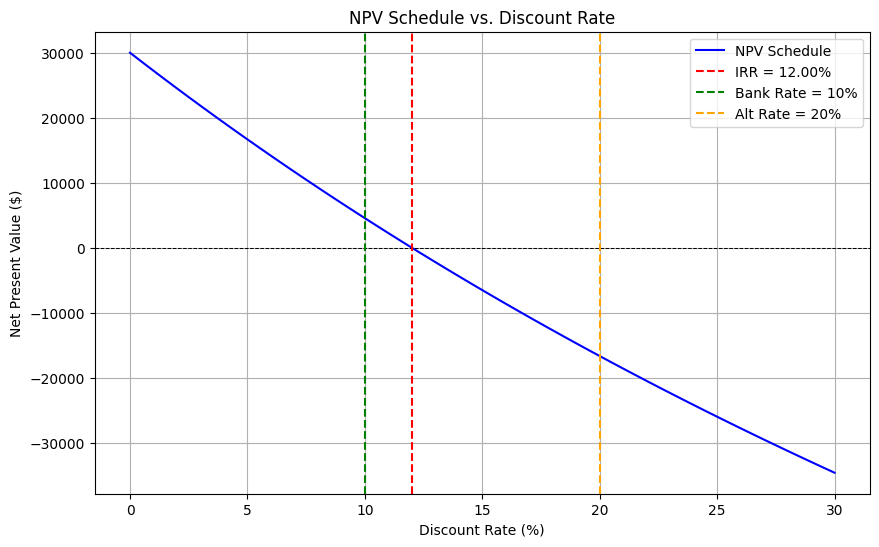

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def calculate_npv(initial_investment, cash_flows, discount_rate):
    """
    Calculates the Net Present Value (NPV) of an investment.
    """
    npv = -initial_investment
    for i, cash_flow in enumerate(cash_flows):
        npv += cash_flow / (1 + discount_rate)**(i + 1)
    return npv

def calculate_irr(initial_investment, cash_flows):
    """
    Calculates the Internal Rate of Return (IRR) of an investment.
    """
    def npv_equation(rate):
        return -initial_investment + sum(cash_flows[i] / (1 + rate)**(i + 1) for i in range(len(cash_flows)))
    try:
        irr_solution = fsolve(npv_equation, 0.1)
        irr = irr_solution[0]
        return irr if irr > -1 else None
    except Exception:
        return None

def generate_npv_schedule(initial_investment, cash_flows, discount_rates):
    """
    Generates an NPV schedule for a range of discount rates.
    """
    npv_values = [calculate_npv(initial_investment, cash_flows, rate) for rate in discount_rates]
    return discount_rates, npv_values

def plot_npv_schedule(discount_rates, npv_values, irr=None, bank_rate=None, alt_rate=None):
    """
    Plots the NPV schedule and optionally marks the IRR, bank rate, and alternative rate.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(discount_rates * 100, npv_values, marker='', linestyle='-', color='blue', label='NPV Schedule') 
    plt.title('NPV Schedule vs. Discount Rate')
    plt.xlabel('Discount Rate (%)') 
    plt.ylabel('Net Present Value ($)') #
    plt.grid(True)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)

    if irr is not None:
        npv_at_irr = calculate_npv(initial_investment, cash_flows, irr)
        plt.axvline(irr * 100, color='red', linestyle='--', label=f'IRR = {irr*100:.2f}%') # vertical line for IRR
        # plt.plot(irr * 100, npv_at_irr, marker='*', markersize=12, color='red', label=f'IRR ≈ {irr*100:.2f}%') 

    if bank_rate is not None:
        plt.axvline(bank_rate * 100, color='green', linestyle='--', label=f'Bank Rate = {bank_rate*100:.0f}%') # vertical line for bank rate

    if alt_rate is not None:
        plt.axvline(alt_rate * 100, color='orange', linestyle='--', label=f'Alt Rate = {alt_rate*100:.0f}%') # vertical line for alternative rate

    plt.legend()
    plt.show()


# Investment Scenario Data
initial_investment = 250000
cash_flows = [280000]
discount_rate_bank = 0.10
discount_rate_alternative = 0.20

# Calculate NPVs and IRR
npv_bank_rate = calculate_npv(initial_investment, cash_flows, discount_rate_bank)
npv_alternative_rate = calculate_npv(initial_investment, cash_flows, discount_rate_alternative)
irr_value = calculate_irr(initial_investment, cash_flows)

# Generate NPV Schedule
discount_rates_schedule = np.linspace(0, 0.30, 50)
schedule_rates, schedule_npvs = generate_npv_schedule(initial_investment, cash_flows, discount_rates_schedule)


# --- Investment Analysis Output (Now at the beginning) ---
print("Investment Analysis:")
print("--------------------")
print("Question:")
print("You are offered an investment in a land that costs $250,000 today and expected to have a value of $280,000 in one year.")
print("A guaranteed bank deposit offers 10% interest for one year and the interest rate in similar alternative investments is 20%.")
print("Should you accept this offer?")
print("\nNPV Calculations:")
print(f"NPV at Bank Deposit Rate (10%): ${npv_bank_rate:,.2f}")
print(f"NPV at Alternative Investment Rate (20%): ${npv_alternative_rate:,.2f}")

if irr_value is not None:
    print(f"\nInternal Rate of Return (IRR): {irr_value*100:.2f}%")
else:
    print("\nCould not calculate IRR for this investment.")

print("\nDecision Recommendation:")
if npv_bank_rate > 0:
    print(f"At a 10% discount rate (Bank Deposit Rate), the NPV is positive (${npv_bank_rate:,.2f}). ")
    print(f"This suggests the investment is profitable compared to the bank deposit.")
else:
    print(f"At a 10% discount rate (Bank Deposit Rate), the NPV is negative (${npv_bank_rate:,.2f}). ")
    print(f"This suggests the investment is NOT profitable compared to the bank deposit.")

if npv_alternative_rate > 0:
    print(f"At a 20% discount rate (Alternative Investment Rate), the NPV is positive (${npv_alternative_rate:,.2f}). ")
    print(f"This suggests the investment is profitable compared to similar alternative investments.")
else:
    print(f"At a 20% discount rate (Alternative Investment Rate), the NPV is negative (${npv_alternative_rate:,.2f}). ")
    print(f"This suggests the investment is NOT profitable compared to similar alternative investments.")

if irr_value is not None:
    if irr_value > discount_rate_alternative:
        print(f"\nThe IRR of {irr_value*100:.2f}% is higher than the alternative investment rate of 20%. ")
        print(f"This further supports accepting the investment.")
    else:
        print(f"\nThe IRR of {irr_value*100:.2f}% is lower than or equal to the alternative investment rate of 20%. ")
        print(f"This suggests the investment may not be as attractive as alternatives with a 20% return.")

print("\nRefer to the NPV Schedule chart below for a visual representation of NPV at different discount rates.")
print("--------------------")
# --- End of Investment Analysis Output ---


# Plot the NPV Schedule (Now after the analysis)
plot_npv_schedule(schedule_rates, schedule_npvs, irr=irr_value, bank_rate=discount_rate_bank, alt_rate=discount_rate_alternative)

---

### Investment Decision Rules
*   Situations in which the IRR rule and NPV rule may be in conflict:
    *   Delayed Investments (aka lending vs. borrowing)
    *   Nonexistent IRR
    *   Multiple IRRs
*   Delayed Investments
    *   For most investment opportunities, expenses occur initially, and cash is received later.
    *   For delayed investments, cash is received upfront, and the costs are incurred later.
    *   This is akin to receiving cash today in exchange for a future liability, for which you would prefer as low a rate as possible.
    *   So optimal rule is to borrow money as long as this rate is less than the cost of capital.

---

### Investment Decision Rules: Example 3.1

*   Having retired from your executive role, you're considering a long-term consulting engagement. A client proposes to pay you a **$800,000** retainer upfront if you commit to a three-year project.

    *   This project will require your full attention for the next three years.
    *   Focusing on this engagement means you'll have to turn down other potential consulting opportunities that would have collectively earned you **$300,000** per year.
    *   Given the risk profile of alternative consulting projects and your investment options, your opportunity cost of capital is estimated to be **8%**.

---

### Investment Decision Rules: Example 3.1
#### NPV
$$
\text{PV}_{\text{lost}} = 300,\!000 \times \frac{1 - (1 + 0.08)^{-3}}{0.08} \qquad \text{PV}_{\text{lost}} = 300,\!000 \times 2.577097 \approx 773,\!129.10
$$
$$
\text{NPV} = 800,\!000 - 773,\!129.10 \approx 26,\!870.90
$$
#### IRR
$$
800,\!000 - \frac{300,\!000}{1+i} - \frac{300,\!000}{(1+i)^2} - \frac{300,\!000}{(1+i)^3} = 0 \qquad \rightarrow \qquad i \approx 0.0613 \quad \text{or} \quad 6.13\%$$


$\rightarrow$ **When the benefits of an investment occur before the costs, the NPV is an *increasing* function of the discount rate.**

---


In [35]:
import numpy_financial as npf

# Cash flows
cash_flows = [800000, -300000, -300000, -300000]  # t=0: retainer, t=1,2,3: forgone income
discount_rate = 0.08  # 8%

# Calculate NPV
npv = npf.npv(discount_rate, cash_flows)

# Print result
print(f"NPV of the consulting project: ${npv:,.2f}")

# Decision
if npv > 0:
    print("Since NPV is positive, you should accept the consulting offer.")
else:
    print("Since NPV is negative, you should reject the consulting offer.")

irr = npf.irr(cash_flows)
print(f"IRR: {irr*100:.2f}%")

NPV of the consulting project: $26,870.90
Since NPV is positive, you should accept the consulting offer.
IRR: 6.13%


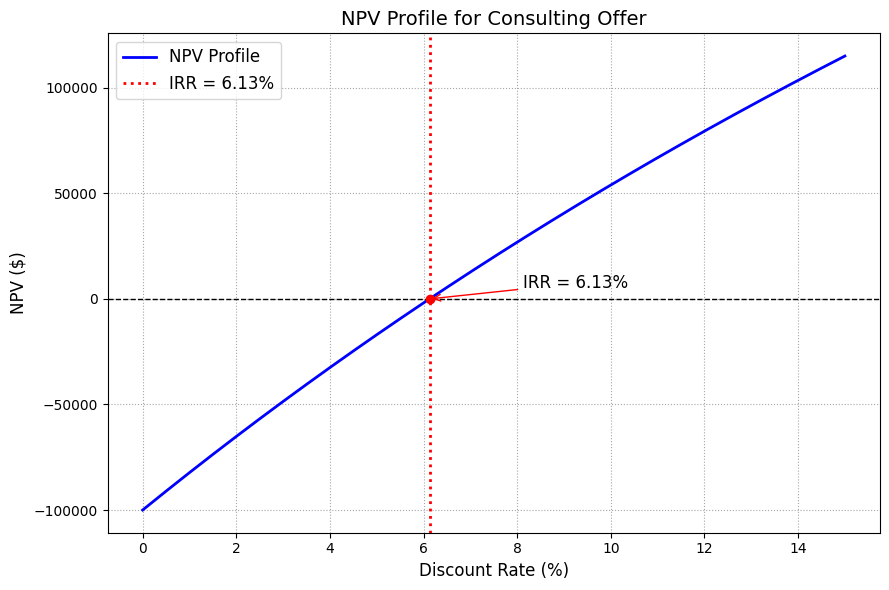

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cash flows for the consulting offer
CF0 = 800000      # cash inflow at time 0
CF1 = -300000     # lost consulting fee at end of Year 1
CF2 = -300000     # lost consulting fee at end of Year 2
CF3 = -300000     # lost consulting fee at end of Year 3

# Define the NPV function as a function of the discount rate r (in decimal)
def npv(r):
    return CF0 + CF1/(1+r) + CF2/(1+r)**2 + CF3/(1+r)**3

# Create a range of discount rates from 0% to 15%
r_vals = np.linspace(0, 0.15, 300)
npv_vals = np.array([npv(r) for r in r_vals])

# Compute the IRR by solving for r such that NPV = 0.
# We solve the equation: CF0 + CF1/(1+r) + CF2/(1+r)**2 + CF3/(1+r)**3 = 0.
# Multiply both sides by (1+r)**3 to obtain a polynomial:
#   CF0*(1+r)**3 + CF1*(1+r)**2 + CF2*(1+r) + CF3 = 0.
# Let x = 1 + r, then the equation becomes:
#   CF0*x^3 + CF1*x^2 + CF2*x + CF3 = 0.
# Solve for x and then IRR = x - 1.

coeffs = [CF0, CF1, CF2, CF3]  # coefficients of x^3, x^2, x, and constant term
roots = np.roots(coeffs)
# Select the real root greater than 1 (since x = 1+r, and r > 0)
x_val = None
for root in roots:
    if np.isreal(root) and root.real > 1:
        x_val = root.real
        break

IRR = x_val - 1 if x_val is not None else None

# Plot the NPV profile
plt.figure(figsize=(9, 6))
plt.plot(r_vals * 100, npv_vals, label='NPV Profile', color='blue', lw=2)
plt.axhline(0, color='black', linestyle='--', lw=1)  # horizontal line at NPV=0

if IRR is not None:
    # Draw a vertical dotted line at the IRR
    plt.axvline(IRR * 100, color='red', linestyle=':', lw=2, label=f'IRR = {IRR*100:.2f}%')
    # Mark the IRR point on the curve
    plt.plot(IRR * 100, 0, 'ro')
    plt.annotate(f'IRR = {IRR*100:.2f}%', 
                 xy=(IRR * 100, 0), 
                 xytext=(IRR * 100 + 2, 5000),
                 arrowprops=dict(arrowstyle="->", color='red'),
                 fontsize=12)

plt.xlabel('Discount Rate (%)', fontsize=12)
plt.ylabel('NPV ($)', fontsize=12)
plt.title('NPV Profile for Consulting Offer', fontsize=14)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


---

### Investment Decision Rules
*   Multiple IRRs
    *   A cash flow stream with K changes in sign can have up to K sensible internal rates of return.
    *   For instance, initial investment (-), profits (+), and further investment (-)
    *   In our example the cash flows were (800,000, -300,000, -300,000, -300,000)
    *   Now assume that the payment structure has changed to (325,000, -300,000, -300,000, -300,000, 600,000) (+, -, -, -, +)

---

Calculated IRRs (High Precision):
IRR 1: 5.484841%
IRR 2: 37.108825%


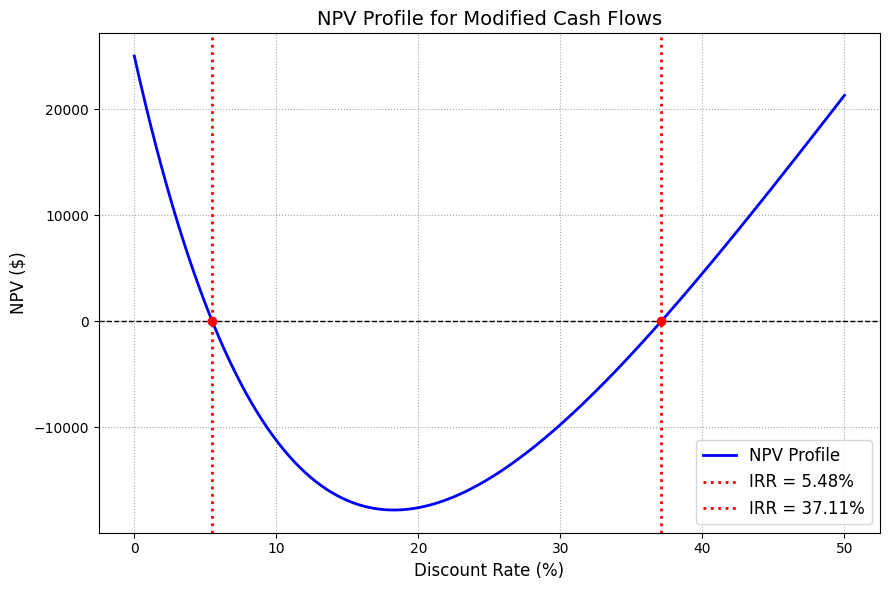

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Modified cash flows:
CF0 = 325000   # Modified Time 0 cash flow
CF1 = -300000  # Time 1
CF2 = -300000  # Time 2
CF3 = -300000  # Time 3
CF4 = 600000   # Time 4

# Define the NPV function for a given discount rate r (in decimal)
def npv(r):
    return (CF0 +
            CF1 / (1 + r) +
            CF2 / (1 + r)**2 +
            CF3 / (1 + r)**3 +
            CF4 / (1 + r)**4)

# -----------------------------------------------------------
# Solve for IRRs using the polynomial approach.
# The NPV equation multiplied by (1+r)^4 is:
#   CF0*(1+r)^4 + CF1*(1+r)^3 + CF2*(1+r)^2 + CF3*(1+r) + CF4 = 0.
# Let x = 1 + r, then:
#   CF0*x^4 + CF1*x^3 + CF2*x^2 + CF3*x + CF4 = 0.
coeffs = [CF0, CF1, CF2, CF3, CF4]
roots = np.roots(coeffs)

# Extract the real roots and convert back to r = x - 1.
IRRs = []
for root in roots:
    if np.isreal(root):
        x_val = np.real(root)
        r_val = x_val - 1
        # Only consider IRRs that are strictly > 0.
        if r_val > 0:
            IRRs.append(r_val)
IRRs.sort()

print("Calculated IRRs (High Precision):")
for idx, irr in enumerate(IRRs, start=1):
    print(f"IRR {idx}: {irr*100:.6f}%")

# -----------------------------------------------------------
# Generate the NPV profile over a range of discount rates (0% to 50%)
r_vals = np.linspace(0, 0.50, 400)
npv_vals = np.array([npv(r) for r in r_vals])

plt.figure(figsize=(9, 6))
plt.plot(r_vals * 100, npv_vals, label='NPV Profile', color='blue', lw=2)
plt.axhline(0, color='black', linestyle='--', lw=1)

# Mark each IRR on the plot with a vertical dotted line and a red marker at NPV = 0
for irr in IRRs:
    plt.axvline(irr * 100, color='red', linestyle=':', lw=2, label=f'IRR = {irr*100:.2f}%')
    plt.plot(irr * 100, 0, 'ro')

plt.xlabel('Discount Rate (%)', fontsize=12)
plt.ylabel('NPV ($)', fontsize=12)
plt.title('NPV Profile for Modified Cash Flows', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()



---

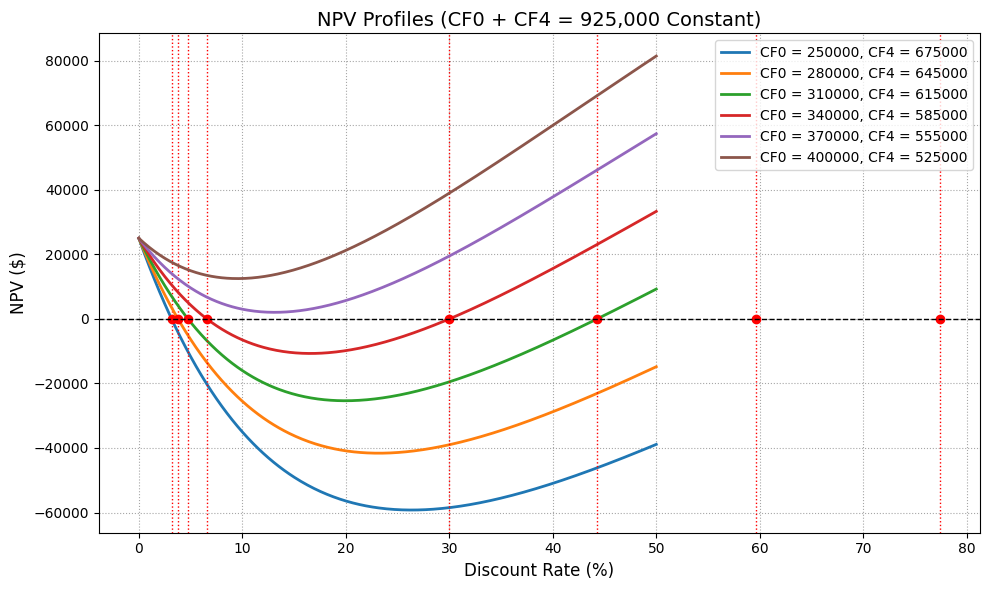

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Simulation Parameters:
# -----------------------------------------------------------
# We want to keep the sum CF0 + CF4 constant.
total = 925000   # Constant total for CF0 and CF4

# Other cash flows (fixed)
CF1 = -300000    # Time 1
CF2 = -300000    # Time 2
CF3 = -300000    # Time 3

# We'll simulate by varying CF0 and adjusting CF4 = total - CF0.
CF0_values = np.linspace(250000, 400000, 6)  # e.g., 6 scenarios from 250k to 400k

# Define a range of discount rates (in decimal form) for the NPV profile.
r_vals = np.linspace(0, 0.50, 400)

# -----------------------------------------------------------
# Define Functions:
# -----------------------------------------------------------
def npv_profile(r, CF0, CF4):
    """
    Calculate the NPV at discount rate r for the cash flow sequence:
    CF0, CF1, CF2, CF3, CF4.
    """
    return (CF0 +
            CF1 / (1 + r) +
            CF2 / (1 + r)**2 +
            CF3 / (1 + r)**3 +
            CF4 / (1 + r)**4)

def compute_irrs(CF0, CF4):
    """
    Compute IRRs for the cash flow sequence using the polynomial approach.
    We solve for r in the equation:
      CF0*(1+r)^4 + CF1*(1+r)^3 + CF2*(1+r)^2 + CF3*(1+r) + CF4 = 0,
    by letting x = 1+r.
    Returns a sorted list of positive IRRs (as decimals).
    """
    coeffs = [CF0, CF1, CF2, CF3, CF4]
    roots = np.roots(coeffs)
    irr_list = []
    for root in roots:
        if np.isreal(root):
            x_val = np.real(root)
            r_val = x_val - 1
            if r_val > 0:
                irr_list.append(r_val)
    irr_list.sort()
    return irr_list

# -----------------------------------------------------------
# Simulation: For each CF0 (and corresponding CF4), compute the NPV profile and IRRs.
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))

for CF0_val in CF0_values:
    CF4_val = total - CF0_val  # Ensure CF0 + CF4 remains constant
    # Compute NPV profile for this scenario.
    npv_vals = np.array([npv_profile(r, CF0_val, CF4_val) for r in r_vals])
    
    # Compute IRRs for this cash flow sequence.
    irrs = compute_irrs(CF0_val, CF4_val)
    
    # Label for this scenario.
    label_text = f'CF0 = {CF0_val:.0f}, CF4 = {CF4_val:.0f}'
    plt.plot(r_vals * 100, npv_vals, label=label_text, lw=2)
    
    # Mark each IRR on the profile with a red circle and vertical dotted line.
    for irr in irrs:
        plt.plot(irr * 100, 0, 'ro')
        plt.axvline(irr * 100, linestyle=':', color='red', lw=1)

# Plot horizontal line at NPV = 0.
plt.axhline(0, color='black', linestyle='--', lw=1)

plt.xlabel('Discount Rate (%)', fontsize=12)
plt.ylabel('NPV ($)', fontsize=12)
plt.title('NPV Profiles (CF0 + CF4 = 925,000 Constant)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


---

### Investment Decision Rules: Example 3.2

Durable Manufacturing Inc. is considering building a new production facility. 
* Upfront costs to construct and equip the facility are **\$15 million**. 
* The facility is expected to generate net operating profits of **\$2.25 million per year** for **15 years**. 
* After the main production phase, the company anticipates ongoing site maintenance and compliance costs estimated at **\$300,000 per year** in perpetuity. 
* Assume all cash flows occur at the end of the year.
    *  What is the NPV of this investment if the cost of capital is **7.5%**? Should the firm undertake the project?
    *  How many IRRs does this investment opportunity potentially have?
    *  Can the IRR rule be reliably used to evaluate this investment?

---

### Investment Decision Rules: Example 3.2
#### NPV Analysis
$NPV = -PV(Cost) + PV(Benefits)$

$PV_{1-15} = 2,\!250,\!000 \times \frac{1 - (1 + r)^{-15}}{r}\approx 2,\!250,\!000 \times 8.828 \approx 19,\!863,\!000.$

$
PV_{\text{perp,15}} = \frac{-300,\!000}{r} = \frac{-300,\!000}{0.075} = -4,\!000,\!000 \qquad \rightarrow \qquad
PV_{\text{perp,0}} = \frac{-4,\!000,\!000}{(1.075)^{15}} \approx \frac{-4,\!000,\!000}{2.95794} \approx -1,\!352,\!130$

$
\begin{aligned}
\text{NPV} &= CF_0 + PV_{1-15} + PV_{\text{perp,0}} \qquad \rightarrow \qquad \text{NPV}= -15,\!000,\!000 + 19,\!863,\!000 - 1,\!352,\!130 \approx 3,\!510,\!870.
\end{aligned}$

#### IRR Analysis
- **Time 0:** $\qquad \qquad \quad  CF_0 = -15,\!000,\!000 \quad (\text{negative}) $
- **Years 1 to 15:** $\qquad \quad CF_t = +2,\!250,\!000 \quad (\text{positive}) $
- **Years 16 onward:** $\qquad  CF_t = -300,\!000 \quad (\text{negative}) $

There are **two sign changes**: (1) From negative at time 0 to positive during years 1–15, (2) from positive during years 1–15 to negative from year 16 onward. Thus, this cash flow pattern can potentially yield **two IRRs**.

---


NPV at 7.5%: $3,509,155.35
Since NPV is positive, the firm should undertake the project.

Calculated IRR 1: 1.60%
Calculated IRR 2: 11.82%

Can the IRR rule be reliably used?
No, the IRR rule cannot be reliably used due to multiple IRRs.


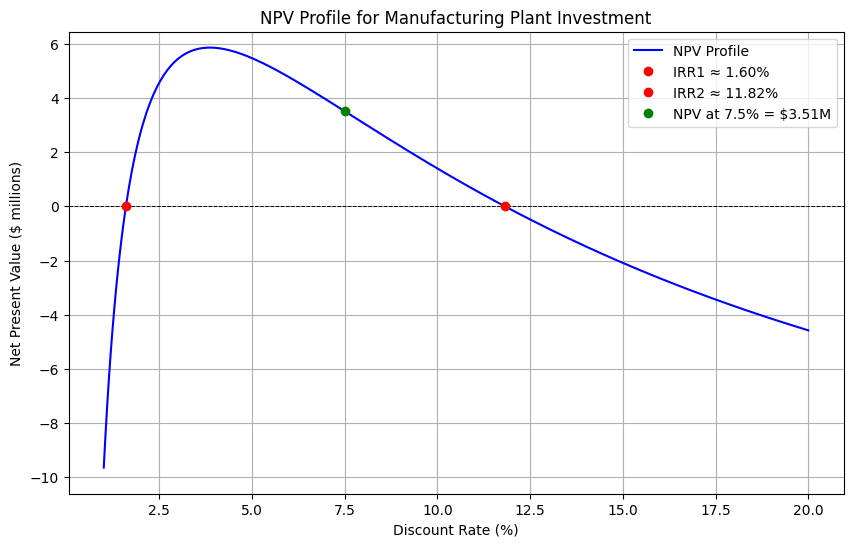

In [79]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# NPV function
def calculate_net_npv(rate):
    epsilon = 1e-12
    if rate <= -1:
        return np.inf
    safe_rate = rate if rate != 0 else epsilon
    initial_investment = -15000000
    net_inflow = 2250000
    annuity_years = 15
    perpetuity_cost = 300000
    pv_annuity = net_inflow * (1 - (1 + safe_rate)**(-annuity_years)) / safe_rate
    pv_perpetuity_at_t15 = perpetuity_cost / safe_rate
    pv_perpetuity_at_t0 = pv_perpetuity_at_t15 / (1 + safe_rate)**annuity_years
    npv = initial_investment + pv_annuity - pv_perpetuity_at_t0
    return npv

# Calculate NPV at 7.5%
cost_of_capital = 0.075
npv = calculate_net_npv(cost_of_capital)
print(f"NPV at {cost_of_capital*100}%: ${npv:,.2f}")
if npv > 0:
    print("Since NPV is positive, the firm should undertake the project.")
else:
    print("Since NPV is negative, the firm should not undertake the project.")

# Find IRRs
irr_guess_1 = 0.015  # Near 1.5%
irr_guess_2 = 0.12   # Near 12%
irr_1 = fsolve(calculate_net_npv, irr_guess_1)[0]
irr_2 = fsolve(calculate_net_npv, irr_guess_2)[0]
sorted_irrs = sorted([irr_1, irr_2])

# Print the calculated IRRs
print(f"\nCalculated IRR 1: {sorted_irrs[0]*100:.2f}%")
print(f"Calculated IRR 2: {sorted_irrs[1]*100:.2f}%")

# Assess IRR rule reliability
print("\nCan the IRR rule be reliably used?")
if len(sorted_irrs) > 1:
    print("No, the IRR rule cannot be reliably used due to multiple IRRs.")
else:
    print(f"Yes, the IRR rule can be used. IRR ({sorted_irrs[0]*100:.2f}%) vs Cost of Capital (7.5%).")

# Plot the NPV profile
rates = np.linspace(0.01, 0.20, 400)  # 1% to 20%
npvs = [calculate_net_npv(r) for r in rates]
npvs_millions = [npv / 1e6 for npv in npvs]  # Convert to millions

plt.figure(figsize=(10, 6))
plt.plot(rates * 100, npvs_millions, label='NPV Profile', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('NPV Profile for Manufacturing Plant Investment')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Net Present Value ($ millions)')  # Updated label
plt.grid(True)

# Mark the IRRs on the plot
for i, irr in enumerate(sorted_irrs):
    plt.plot(irr * 100, 0, 'ro', label=f'IRR{i+1} ≈ {irr*100:.2f}%')

# Mark NPV at 7.5%
npv_at_cost = calculate_net_npv(cost_of_capital)
npv_at_cost_millions = npv_at_cost / 1e6
plt.plot(cost_of_capital * 100, npv_at_cost_millions, 'go', label=f'NPV at 7.5% = ${npv_at_cost_millions:,.2f}M')
plt.legend()

# Adjust y-limits
max_npv_in_range = max(npvs_millions)
min_npv_in_range = min(npvs_millions)
plt.ylim(min_npv_in_range - 0.1 * abs(min_npv_in_range), max_npv_in_range + 0.1 * max_npv_in_range)

plt.show()

---

### Investment Decision Rules

*   Nonexistent IRR
    *   When there is no discount rate that makes the NPV equal to zero, no IRR exists.
    *   Cash flows : (250,000, -300,000, -300,000, -300,000, 675,000)
    *   Cash flows : (280,000, -300,000, -300,000, -300,000, 645,000)

<center>
<img src="../figures/npv_profile_02.png" width="720"/>
</center>

---

### Investment Decision Rules

| Flows                                                                        | Number of IRRs   | IRR Criterion          | NPV Criterion          |
| :--------------------------------------------------------------------------- | :--------------- | :--------------------- | :--------------------- |
| First cash flow is negative and all remaining cash flows are positive.       | 1                | Accept if IRR > r. Reject if IRR < r. | Accept if NPV > 0. Reject if NPV < 0. |
| First cash flow is positive and all remaining cash flows are negative.       | 1                | Accept if IRR < r. Reject if IRR > r. | Accept if NPV > 0. Reject if NPV < 0. |
| Some cash flows after first are positive and some cash flows after first are negative. | May be more than 1. | No valid IRR.          | Accept if NPV > 0. Reject if NPV < 0. |

---

### Investment Decision Rules: The Payback Rule
*   States that you should only accept a project if its cash flows pay back its initial investment within a prespecified period.
    *   First calculate the amount of time it takes to pay back the initial investment, called the payback period.
    *   Accept the project if the payback period is less than a prespecified length of time.
    *   Otherwise, you reject.
*   The payback rule is not as reliable as the NPV rule because;
    *   Ignores the project's cost of capital and the time value of money,
    *   Ignores cash flows after the payback period,
    *   Relies on an ad hoc decision criterion (what is the right number of years to require for the payback period?)
*   Why is it used given the pitfalls?
    *   Usually for small investment decisions
    *   Provides budgeting information regarding the length of time capital will be committed to a project.
    *   As a pre-NPV filter:
        *  If the required payback period is short (one or two years), then most projects that satisfy the payback rule will have a positive NPV.

---

### Investment Decision Rules
*   NPV Rule and Mutually Exclusive Investments
    *   When projects are mutually exclusive, we need to determine which projects have a positive NPV and then rank the projects to identify the best one.
    *   Pick the project with the highest NPV.

#### Exercise 3.1: Evaluating Three Mutually Exclusive Projects Using NPV

Innovative Manufacturing Corp. is evaluating three mutually exclusive projects, each with a 5-year time horizon. The firm’s cost of capital is **10%**. The following table shows the cash flows for each project (all cash flows occur at the end of each year):

| Year | Project A     | Project B     | Project C    |
|:------:|---------------:|---------------:|--------------:|
| 0    | \$-1,000,000  | \$-1,200,000  | \$-800,000   |
| 1    | \$300,000     | \$400,000     | \$250,000   |
| 2    | \$350,000     | \$450,000     | \$300,000   |
| 3    | \$400,000     | \$500,000     | \$350,000   |
| 4    | \$450,000     | \$550,000     | \$400,000   |
| 5    | \$500,000     | \$600,000     | \$450,000   |

1. For each project, compute the Net Present Value (NPV) using the formula:  
2. Based on the NPV rule, which project should Innovative Manufacturing Corp. undertake? Explain your reasoning.

---

### Exercise 3.1: Solution

$$
NPV = \sum_{t=0}^{n} \frac{CF_t}{(1+r)^t} = CF_0 + \frac{CF_1}{(1+r)^1} + \frac{CF_2}{(1+r)^2} + \dots + \frac{CF_n}{(1+r)^n}
$$

**Project A:**
$\qquad NPV_A = -1,000,000 + \frac{300,000}{(1.10)^1} + \frac{350,000}{(1.10)^2} + \frac{400,000}{(1.10)^3} + \frac{450,000}{(1.10)^4} + \frac{500,000}{(1.10)^5} \qquad \rightarrow \qquad  NPV_A = \$480,326.11$

**Project B:** $\qquad NPV_B = -1,200,000 + \frac{400,000}{(1.10)^1} + \frac{450,000}{(1.10)^2} + \frac{500,000}{(1.10)^3} + \frac{550,000}{(1.10)^4} + \frac{600,000}{(1.10)^5} \qquad \rightarrow \qquad NPV_B = \$659,404.78 $

**Project C:** $\qquad NPV_C = -800,000 + \frac{250,000}{(1.10)^1} + \frac{300,000}{(1.10)^2} + \frac{350,000}{(1.10)^3} + \frac{400,000}{(1.10)^4} + \frac{450,000}{(1.10)^5} \qquad \rightarrow \qquad \quad NPV_C = \$490,786.77$

Based on the NPV rule, Innovative Manufacturing Corp. should undertake **Project B**. 
It is expected to generate the greatest increase in value for the firm compared to the other mutually exclusive options.

---

In [80]:
import numpy as np
import numpy_financial as npf

# Define the cash flows for each project
project_a = [-1000000, 300000, 350000, 400000, 450000, 500000]  # Project A cash flows
project_b = [-1200000, 400000, 450000, 500000, 550000, 600000]  # Project B cash flows
project_c = [-800000, 250000, 300000, 350000, 400000, 450000]   # Project C cash flows

# Define the cost of capital (discount rate)
discount_rate = 0.10  # 10%

# Calculate NPV for each project using npf.npv
# npf.npv assumes the first cash flow (t=0) is not discounted, which matches our problem
npv_a = npf.npv(discount_rate, project_a)
npv_b = npf.npv(discount_rate, project_b)
npv_c = npf.npv(discount_rate, project_c)

# Print the NPV for each project with formatting
print(f"NPV for Project A: ${npv_a:,.2f}")
print(f"NPV for Project B: ${npv_b:,.2f}")
print(f"NPV for Project C: ${npv_c:,.2f}")

# Determine the best project based on the NPV rule
npvs = {'Project A': npv_a, 'Project B': npv_b, 'Project C': npv_c}
best_project = max(npvs, key=npvs.get)

# Print the decision
print(f"\nBest Project: {best_project} with NPV = ${npvs[best_project]:,.2f}")
print("Reasoning: Among mutually exclusive projects, choose the one with the highest NPV, provided it is positive.")

NPV for Project A: $480,326.11
NPV for Project B: $659,404.78
NPV for Project C: $490,786.77

Best Project: Project B with NPV = $659,404.78
Reasoning: Among mutually exclusive projects, choose the one with the highest NPV, provided it is positive.


---


### Exercise 3.2

You have four options for launching a business in a bustling downtown district. The cash flow estimates, including the cost of purchasing or leasing the property, are as follows:

| Project             | Initial Investment | First-Year Cash Flow | Growth Rate | Cost of Capital |
|:---------------------|--------------------:|----------------------:|-------------:|-----------------:|
| Boutique Cafe       | \$350,000          | \$90,000             | 4.0%        | 9%              |
| Co-working Space    | \$450,000          | \$100,000            | 3.5%        | 9%              |
| Organic Market      | \$400,000          | \$110,000            | 0.0%        | 9%              |
| Tech Repair Shop    | \$350,000          | \$95,000             | 4.0%        | 12%             |

Assume that:
- Cash flows occur at the end of each year.
- The growth rate applies to the first-year cash flow for all subsequent years.
- The analysis period is 10 years for all projects.

1. For each project, compute the Net Present Value (NPV).
2. Based on the NPV rule, which project should you choose? Explain your reasoning.

---

### Exercise 3.2: NPV Solution

**Boutique Cafe:** $\qquad PV_{\text{Cafe}} = \frac{90,000}{0.09 - 0.04} \left[ 1 - \left( \frac{1+0.04}{1+0.09} \right)^{10} \right] \quad \rightarrow \quad PV_{\text{Cafe}} \approx 672,320.91 $

$\qquad \qquad \qquad \qquad NPV_{\text{Cafe}} = 672,320.91 - 350,000 \approx 322,320.91 $

**Co-working Space:** $\quad PV_{\text{Co-work}} = \frac{100,000}{0.09 - 0.035} \left[ 1 - \left( \frac{1+0.035}{1+0.09} \right)^{10} \right] \quad \rightarrow \quad PV_{\text{Co-work}} \approx 735,124.38 $

$\qquad \qquad \qquad \qquad NPV_{\text{Co-work}} = 735,124.38 - 450,000 \approx 285,124.38 $

**Organic Market:** $\quad \quad PV_{\text{Market}} = \frac{110,000}{0.09} \left[ 1 - \frac{1}{(1+0.09)^{10}} \right] \quad \rightarrow \quad PV_{\text{Market}} \approx 705,939.39 $

$\qquad \qquad \qquad \qquad NPV_{\text{Market}} = 705,939.39 - 400,000 \approx 305,939.39 $

**Tech Repair Shop:** $\quad PV_{\text{Tech}} = \frac{95,000}{0.12 - 0.04} \left[ 1 - \left( \frac{1+0.04}{1+0.12} \right)^{10} \right] \quad \rightarrow \quad PV_{\text{Tech}} \approx 623,833.57 $

$\qquad \qquad \qquad \qquad NPV_{\text{Tech}} = 623,833.57 - 350,000 \quad \approx 273,833.57 $

---

### Investment Decision Rules
*   IRR Rule and Mutually Exclusive Investments
    *   Picking one project over another simply because it has a larger IRR can lead to mistakes.
    *   When projects differ in their scale of investment, the timing of their cash flows, or their riskiness, then their IRRs cannot be meaningfully compared.
        *   If a project has a positive NPV, then if we can double its size, its NPV will double.
        *   By the Law of One Price, doubling the cash flows of an investment opportunity must make it worth twice as much.
        *   However, the IRR is unaffected by the scale of the investment opportunity because the IRR measures the average return of the investment.
    *   Even when projects have the same scale, the IRR may lead you to rank them incorrectly due to differences in the timing of the cash flows.
        *   The IRR is expressed as a return, but the dollar value of earning a given return depends on how long the return is earned.
        *   Even when projects have the same horizon, the pattern of cash flows over time will often differ.
    *   An IRR that is attractive for a safe project need not be attractive for a risky project.
    
    ---

### Exercise 3.2: IRR Solution

*   **Boutique Cafe:**
    $350,000 = \frac{90,000}{r - 0.04} \left[ 1 - \left( \frac{1.04}{1+r} \right)^{10} \right] \quad \rightarrow \quad IRR_{\text{Cafe}} \approx 18.26\%$

*   **Co-working Space:**
    $450,000 = \frac{100,000}{r - 0.035} \left[ 1 - \left( \frac{1.035}{1+r} \right)^{10} \right] \quad \rightarrow \quad IRR_{\text{Co-work}} \approx 14.77\%$

*   **Organic Market:**
    $400,000 = \frac{110,000}{r} \left[ 1 - \frac{1}{(1+r)^{10}} \right] \quad \rightarrow \quad IRR_{\text{Market}} \approx 19.86\%$

*   **Tech Repair Shop:**
    $350,000 = \frac{95,000}{r - 0.04} \left[ 1 - \left( \frac{1.04}{1+r} \right)^{10} \right] \quad \rightarrow \quad IRR_{\text{Tech}} \approx 20.48\%$


| Project             | Initial Investment | First-Year Cash Flow | Growth Rate | Cost of Capital | NPV                      | IRR                 |
|:---------------------|--------------------:|----------------------:|-------------:|-----------------:|--------------------------:|------------------------:|
| Boutique Cafe       | \$350,000          | \$90,000             | 4.0%        | 9%              | \$322,320.91             | 18.26%                 |
| Co-working Space    | \$450,000          | \$100,000            | 3.5%        | 9%              | \$285,124.38             | 14.77%                 |
| Organic Market      | \$400,000          | \$110,000            | 0.0%        | 9%              | \$305,939.39             | 19.86%                 |
| Tech Repair Shop    | \$350,000          | \$95,000             | 4.0%        | 12%             | \$273,833.57             | 20.48%                 |

---

### Investment Decision Rules: Different Lifespans

#### Example 3.3
You are evaluating two mutually exclusive investment opportunities. Both require the same initial investment and your company's cost of capital is 10%. Project X is focused on focused on capturing a short-term market trend, has a lifespan of 3 years, and projected to generate cash flows of $\$43,800$ per year. On the other hand, Project Y has benefits that spread over six years, and estimated cash flows of $\$26,430$ per year. Both projects require the same amount of investment, $\$100,000$.
1.  Calculate the Internal Rate of Return (IRR) for each project (verify they are approximately equal).
2.  Based *only* on IRR, which project would you choose?
2.  Calculate the Net Present Value (NPV) for each project using the 10% cost of capital.
3.  Based *only* on NPV, which project would you choose? 
4.  Calculate the Equivalent Annual Annuity (EAA) for each project.
5.  Based on the EAA, which project should you choose and why?

---

### Investment Decision Rules: Different Lifespans
**Project X:** $\qquad 100,000 = 43,800 \times \left[ \frac{1 - (1+r)^{-3}}{r} \right] \quad \rightarrow \quad IRR_X \approx 15.01\%$

**Project Y:** $\qquad 100,000 = 26,430 \times \left[ \frac{1 - (1+r)^{-6}}{r} \right] \quad \rightarrow \quad  IRR_Y \approx 15.01\%$


**Project X:**
 *   $C = 43,800$, $N=3$, $r=0.10$
 *   $NPV_X = -100,000 + 43,800 \times \frac{1 - (1.10)^{-3}}{0.10} \quad \rightarrow \quad NPV_X = 108,924.11 - 100,000 = \$8,924.11$


**Project Y:**
 *   $C = 26,430$, $N=6$, $r=0.10$
 *   $NPV_Y = -100,000 + 26,430 \times \frac{1 - (1.10)^{-6}}{0.10} \quad \rightarrow \quad NPV_Y = 115,109.53 - 100,000 = \$15,109.53$

---

### Investment Decision Rules: Different Lifespans

**Equivalent Annual Annuity (EAA)**

$$ EAA = \frac{NPV}{PVIFA(r, N)} = \frac{NPV}{(\frac{1 - (1+r)^{-N}}{r})}$$

**Project X:**
    *   $NPV_C = 8,924.11 \quad \text{and} \quad PVIFA(10\%, 3) = \frac{1 - (1.10)^{-3}}{0.10} = 2.486851 \quad \rightarrow \quad EAA_C = \frac{8,924.11}{2.486851} \approx \$3,588.49$

**Project Y:**
    *   $NPV_D = 15,109.53 \quad \text{and} \quad PVIFA(10\%, 6) = \frac{1 - (1.10)^{-6}}{0.10} = 4.355260 \quad \rightarrow \quad EAA_D = \frac{15,109.53}{4.355260} \approx \$3,469.23$

|            | IRR      | NPV         | EAA        |
|------------|----------|-------------|------------|
| Project X  | 15.01%   | \$8,924.11  | \$3,588.49 |
| Project Y  | 15.01%   | \$15,109.53 | \$3,469.23 |

**The required minimum annual cash flow for a hypothetical reinvestment project following Project X that would make the overall strategy equivalent to Project Y on an annualized basis.**

$ \text{Target Combined NPV} = NPV_X + PV_{reinvest}(\text{at } t=0) \quad \rightarrow \quad 15,109.53 = 8,924.11 + PV_{reinvest}(\text{at } t=0)$

$PV_{reinvest}(\text{at } t=0) = 15,109.53 - 8,924.11 = \$6,185.42 \quad \text{and} \quad PV_{reinvest}(\text{at } t=3) = C_{reinvest} \times PVIFA(10\%, 3)$

$PV_{reinvest}(\text{at } t=0) = \frac{PV_{reinvest}(\text{at } t=3)}{(1+r)^3} \quad \rightarrow \quad \$6,185.42 = \frac{PV_{reinvest}(\text{at } t=3)}{(1.10)^3} \quad \rightarrow \quad PV_{reinvest}(\text{at } t=3) = \approx \$8,232.80$

$PV_{reinvest}(\text{at } t=3) = C_{reinvest} \times PVIFA(10\%, 3) \quad \rightarrow \quad 8,232.80 = C_{reinvest} \times 2.486851 \quad \rightarrow \quad C_{reinvest} \approx 3310.53$

---

### Investment Decision Rules: The Incremental IRR
*   IRR of the incremental cash flows that would result from replacing one project with the other.
    *   Tells us the discount rate at which it becomes profitable to switch from one project to the other.

#### Exercise 3.3

*   Your tech company is planning a major software platform update and has two potential strategies:

    *   Strategy A (Standard Update): A reliable update focusing on core features and stability.
    *   Strategy B (Advanced Update): A more ambitious update including AI-driven features and requiring more upfront resources.

    The projected net cash flows for each strategy are as follows (in thousands of dollars):

    | Strategy        | Year 0 | Year 1 | Year 2 | Year 3 | Year 4 |
    | :--------------: | :-----: | :-----: | :-----: | :-----: | :-----: |
    | Standard Update | -800   | 300    | 300    | 300    | 300    |
    | Advanced Update | -1500  | 520    | 520    | 520    | 520    |

    
    1.  What is the Internal Rate of Return (IRR) of each strategy?
    2.  What are the cash flows for the incremental investment (Strategy B - Strategy A)?
    3.  What is the IRR of this incremental investment?
    4.  If the cost of capital for both projects is 11%, which strategy should your company choose? Explain your reasoning using the incremental IRR.

---

### Solution to Exercise 3.3:
Strategy A : $\qquad 800 = 300 \times \left[ \frac{1 - (1+IRR_A)^{-4}}{IRR_A} \right] \quad \rightarrow \quad IRR_A \approx 18.45%$

Strategy B : $\qquad 1500 = 520 \times \left[ \frac{1 - (1+IRR_B)^{-4}}{IRR_B} \right] \quad \rightarrow \quad IRR_B \approx 15.31%$

**Incremental Cash Flows**
| Year | Strategy B | Strategy A | Incremental (B - A) |
| :---: | :---------: | :---------: | :------------------: |
| 0    | -1500      | -800       | -700                |
| 1    | 520        | 300        | 220                 |
| 2    | 520        | 300        | 220                 |
| 3    | 520        | 300        | 220                 |
| 4    | 520        | 300        | 220                 |

$ 700 = 220 \times \left[ \frac{1 - (1+IRR_{B-A})^{-4}}{IRR_{B-A}} \right] \quad \rightarrow \quad IRR_{B-A} \approx 9.82%$

The decision rule for mutually exclusive projects using incremental IRR is:
*   Accept the larger project (Strategy B) if the IRR of the incremental investment is **greater than** the cost of capital.
*   Choose the smaller project (Strategy A) if the IRR of the incremental investment is **less than** the cost of capital.

---

<center>
<img src="../figures/incremental_irr.png" width="720"/>
</center>

---

### Investment Decision Rules: The Incremental IRR
*   When using the incremental IRR to choose between projects, we encounter all the same problems that arise with the IRR rule.
    *   Even if the negative cash flows precede the positive ones for the individual projects, it need not be true for the incremental cash flows. If not, the incremental IRR is difficult to interpret, and may not exist or may not be unique.
    *   The incremental IRR can indicate whether it is profitable to switch from one project to another, but it does not indicate whether either project has a positive NPV on its own.
    *   When the individual projects have different costs of capital, it is not obvious what cost of capital the incremental IRR should be compared to.
*   The incremental IRR provides useful information by telling us the discount rate at which our optimal project choice would change but using it as a decision rule is difficult and error prone.

---


### Investment Decision Rules: Profitability Index
*   Project selection with resource constraints
    *   Different projects may demand different amounts of a particular scarce resource.
    *   Optimize under constraint(s).
    *   Consider three possible projects with a $100 million budget constraint:

    | Project | NPV (\$ millions) | Initial Investment (\$ millions) | Profitability Index (NPV/Investment) |
    | :------:| :---------------:| :------------------------------:|:-----------------------------------:|
    | I       | 110              | 100                             | 1.1                                  |
    | II      | 70               | 50                              | 1.4                                  |
    | III     | 60               | 50                              | 1.2                                  |


*   Profitability Index: Measures the value created in terms of NPV per unit of resource consumed.
$$
\text{Profitability Index} = \frac{\text{Value Created}}{\text{Resource Consumed}} = \frac{NPV}{\text{Resource Consumed}}
$$
*   Can be used to identify the optimal combination of projects to undertake.
    *   Compute the profitability index,
    *   Rank projects based on PI value,
    *   Start with the project with the highest index and move down the ranking,
    *   Take all projects until the resource is consumed.

---

### Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours

Suppose your software development firm has identified the following five potential projects, all deemed to have positive Net Present Values (NPVs).

*   There are not enough specialized senior developer hours available in the next quarter to undertake all desirable projects.
*   Use the profitability index method to choose the optimal combination of projects, given that you only have 3,000 senior developer hours available.

    | Project                      | NPV      | Senior Developer Hours Needed |
    | :--------------------------- | -------: | ----------------------------: |
    | Cloud Infrastructure Upgrade | \$120,000 | 1,000                         |
    | AI Analytics Engine          | \$95,000  | 800                           |
    | Mobile App Revamp            | \$70,000  | 750                           |
    | Security Audit & Patching    | \$50,000  | 400                           |
    | Database Performance Tuning  | \$45,000  | 500                           |
    | **Total**                    | \$380,000 | 3,450                         |

___

### Solution to Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours
1.  **Calculate PI for each project:**
    *   PI = NPV / Senior Developer Hours Needed
    *   PI<sub>Cloud</sub> = $120,000 / 1,000 = 120$
    *   PI<sub>AI</sub> = $95,000 / 800 = 118.75$
    *   PI<sub>Mobile</sub> = $70,000 / 750 \approx 93.33$
    *   PI<sub>Security</sub> = $50,000 / 400 = 125$
    *   PI<sub>Database</sub> = $45,000 / 500 = 90$

2.  **Rank Projects by PI:**
    1.  Security Audit & Patching (PI = 125)
    2.  Cloud Infrastructure Upgrade (PI = 120)
    3.  AI Analytics Engine (PI = 118.75)
    4.  Mobile App Revamp (PI = 93.33)
    5.  Database Performance Tuning (PI = 90)

---

### Solution to Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours
3.  **Select Projects based on Rank and Resource Constraint (3,000 hours):**

    | Rank | Project          | Hours Needed | Cumulative Hours | Remaining Hours | Action   | Cumulative NPV |
    | :--- | :--------------- | -----------: | ---------------: | --------------: | :-------: | -------------: |
    | 1    | Security         | 400          | 400              | 2,600           | Select   | \$50,000       |
    | 2    | Cloud            | 1,000        | 1,400            | 1,600           | Select   | \$170,000      |
    | 3    | AI Engine        | 800          | 2,200            | 800             | Select   | \$265,000      |
    | 4    | Mobile Revamp    | 750          | 2,950            | 50              | Select   | \$335,000      |
    | 5    | Database Tuning  | 500          | (3,450)          | 50              | Reject   | \$335,000      |

**Conclusion:** Based on the Profitability Index ranking and the constraint of 3,000 senior developer hours, the firm should undertake the following projects:
*   Security Audit & Patching
*   Cloud Infrastructure Upgrade
*   AI Analytics Engine
*   Mobile App Revamp

This combination utilizes 2,950 hours and generates a total NPV of \$335,000, maximizing the value obtained from the limited developer hours.

---

### Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours, Additional Project

Suppose the firm identifies an additional small, urgent project: "Quick Bug Fix Initiative". This project has an NPV of \$20,000 and requires 150 senior developer hours.
  *   Calculate the Profitability Index for this new project.
  *   How does this project rank compared to the others based on PI?
  *   Re-evaluate the project selection using the PI ranking and the 3,000-hour limit, including this new project. What is the total NPV of the selected projects now?

---

### Solution to Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours, Additional Project

PI<sub>BugFix</sub> = NPV / Hours = $20,000 / 150 \approx 133.33$

*   **New Ranking:**
    1.  Quick Bug Fix Initiative (PI = 133.33)
    2.  Security Audit & Patching (PI = 125)
    3.  Cloud Infrastructure Upgrade (PI = 120)
    4.  AI Analytics Engine (PI = 118.75)
    5.  Mobile App Revamp (PI = 93.33)
    6.  Database Performance Tuning (PI = 90)

    | Rank | Project          | Hours Needed | Cumulative Hours | Remaining Hours | Action   | Cumulative NPV |
    | :--- | :--------------- | -----------: | ---------------: | --------------: | -------: | -------------: |
    | 1    | Bug Fix          | 150          | 150              | 2,850           | Select   | \$20,000       |
    | 2    | Security         | 400          | 550              | 2,450           | Select   | \$70,000       |
    | 3    | Cloud            | 1,000        | 1,550            | 1,450           | Select   | \$190,000      |
    | 4    | AI Engine        | 800          | 2,350            | 650             | Select   | \$285,000      |
    | 5    | Mobile Revamp    | 750          | (3,100)          | 650             | Reject   | \$285,000      | 
    | 6    | Database Tuning  | 500          | ---              | 650             | Reject   | \$285,000      | 

---

### Solution to Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours, Additional Project
<center>
<img src="../figures/pi_extra.png" width="720"/>
</center>

---

### Solution to Exercise 3.4: Prioritizing IT Projects with Limited Staff Hours, Additional Project

**Selection Table Revisited (Checking Lower Ranks)**

| Rank | Project                      | Hours Needed | Cumulative Hours | Remaining Hours | Action        | Cumulative NPV | Notes                                     |
| :--- | :--------------------------- | -----------: | ---------------: | --------------: | :------------: | -------------: | :---------------------------------------- |
|      |                              |              | 0                | 3,000           |               | \$0            | Start                                     |
| 1    | Quick Bug Fix Initiative     | 150          | 150              | 2,850           | Select        | \$20,000       | Highest PI                                |
| 2    | Security Audit & Patching    | 400          | 550              | 2,450           | Select        | \$70,000       | Next highest PI                           |
| 3    | Cloud Infrastructure Upgrade | 1,000        | 1,550            | 1,450           | Select        | \$190,000      | Next highest PI                           |
| 4    | AI Analytics Engine          | 800          | 2,350            | 650             | Select        | \$285,000      | Next highest PI                           |
| 5    | Mobile App Revamp            | 750          | ---              | 650             | Reject        | \$285,000      | Needs 750, only 650 remaining           |
| 6    | Database Performance Tuning  | 500          | 2,850            | 150             | Select        | \$330,000      | Fits in remaining 650 hours               |


By checking lower-ranked projects after rejecting one due to insufficient resources, we find that the "Database Performance Tuning" project (Rank 6, 500 hours needed) fits within the 650 hours remaining after selecting the top 4 projects.

___

### Exercise 3.5: Evaluating Product Line Expansion Options

Innovate Solutions is evaluating three potential new product line expansions for the upcoming fiscal year. The finance department has estimated the following net cash flows for each project (in thousands of dollars):

| Year | Product Line Alpha | Product Line Beta | Product Line Gamma |
| :--- | -----------------: | ----------------: | -----------------: |
| 0    | - \$150            | - \$300           | - \$220.0            |
| 1    | \$90               | \$100             | - \$4.2            |
| 2    | \$50               | \$120             | \$80.0               |
| 3    | \$30               | \$150             | \$176.4            |
| 4    | \$10               | \$80              | \$120.0              |

*   The required rate of return (cost of capital) for all projects is **12%**. The company has a strict capital expenditure (CAPEX) budget of **\$550,000** for these new projects. Cash flows occur at the end of each year.

* For each project, calculate the payback period, IRR, NPV and PI. 
  * Rank the projects based on each individual metric (Payback, IRR, NPV, PI).
  * Assuming the projects are independent (but subject to the budget constraint), which projects should Innovate Solutions undertake to maximize value, based on the Profitability Index rule for capital rationing? What is the total NPV of the selected projects?
  * Now, consider Beta and Gamma as *mutually exclusive* alternatives for a moment (ignore Alpha and the budget). Calculate the incremental cash flows (Beta - Gamma) and the Incremental IRR. Based on the Incremental IRR and the 12% cost of capital, which of these two (Beta or Gamma) would be preferred if they were the only options?
  * Discuss any conflicts observed between the different ranking methods and justify the final investment decision made in step 3.

---

### Solution to Exercise 3.5: Evaluating Product Line Expansion Options
| Year | Product Line Alpha | Product Line Beta | Product Line Gamma |
| :--- | -----------------: | ----------------: | -----------------: |
| 0    | - \$150            | - \$300           | - \$220.0            |
| 1    | \$90               | \$100             | - \$4.2            |
| 2    | \$50               | \$120             | \$80.0               |
| 3    | \$30               | \$150             | \$176.4            |
| 4    | \$10               | \$80              | \$120.0              |

**Payback Period:**
* Project Alpha: Payback = 2 years + (10.00 / 30.00) = 2.33 years
* Project Beta: Payback = 2 years + (80.00 / 150.00) = 2.53 years
* Project Gamma: Payback = 2 years + (144.20 / 176.40) = 2.82 years

---

### Solution to Exercise 3.5: Evaluating Product Line Expansion Options

#### Net Present Value (NPV) @ 12%

| Year/Component               | Product Line Alpha | Product Line Beta | Product Line Gamma |
| :--------------------------- | -----------------: | ----------------: | -----------------: |
| Cash Flows                   |                    |                   |                    |
| 0                            | - \$150.00         | - \$300.00        | - \$220.00    |
| 1                            | \$90.00            | \$100.00          | - \$4.20      |
| 2                            | \$50.00            | \$120.00          | \$80.00       |
| 3                            | \$30.00            | \$150.00          | \$176.40      |
| 4                            | \$10.00            | \$80.00           | \$120.00      |
| Present Value of Inflows     |                    |                   |               |
| PV (Year 1)                  | \$80.36            | \$89.29           | - \$3.75      |
| PV (Year 2)                  | \$39.86            | \$95.66           | \$63.77       |
| PV (Year 3)                  | \$21.35            | \$106.77          | \$125.54      |
| PV (Year 4)                  | \$6.36             | \$50.84           | \$76.26       |
| **Sum of PV of Inflows**     | **\$147.93**       | **\$342.56**      | **\$261.83**  |
| **Net Present Value (NPV)**  | **- \$2.07**       | **\$42.56**       | **\$41.83**   |

---

### Solution to Exercise 3.5: Evaluating Product Line Expansion Options
**IRR:**
* Project Alpha: $\quad \quad 0 = -150 + 90/(1+IRR)^1 + 50/(1+IRR)^2 + 30/(1+IRR)^3 + 10/(1+IRR)^4 \qquad \rightarrow \quad IRR = 11.39%$
* Project Beta: $\, \;\quad \quad 0 = -300 + 100/(1+IRR)^1 + 120/(1+IRR)^2 + 150/(1+IRR)^3 + 80/(1+IRR)^4 \quad \rightarrow \quad IRR = 18.51%$
* Project Gamma: $\; \quad 0 = -220 - 4.2/(1+IRR)^1 + 80/(1+IRR)^2 + 176.4/(1+IRR)^3 + 120/(1+IRR)^4 \quad \rightarrow \quad IRR = 18.89%$

**Profitability Index (PI):**
* Project Alpha: $\qquad \qquad \qquad  \qquad \quad  PI =  \frac{\text{Total PV of Inflows}}{\text{Initial Investment}} = \frac{147.93}{150.00} = 0.986176$

* Project Beta: Payback = $\qquad \qquad \qquad \qquad \qquad \qquad \quad \, PI = \frac{342.56}{300.00} = 1.141859$

* Project Gamma: Payback = $\qquad \qquad \qquad \qquad \qquad \qquad PI = \frac{261.83}{220.00} = 1.190136$

**Project Rankings**

| Metric        | Alpha        | Beta         | Gamma   | Rank: Alpha | Rank: Beta | Rank: Gamma |
| :------------ | -----------: | -----------: | -----------: | :----------: | :---------: | :----------: |
| Payback (yrs) | 2.33 | 2.53   | 2.82   | 1st         | 2nd        | 3rd         |
| IRR (%)       | 11.39  | 18.51  | 18.89| 3rd         | 2nd        | 1st         |
| NPV ($k)      | -2.07  | 42.56 | 41.83  | 3rd         | 1st        | 2nd         |
| PI            | 0.99    | 1.14 | 1.19| 3rd         | 2nd        | 1st         |


---

### Solution to Exercise 3.5: Evaluating Product Line Expansion Options

**Capital Rationing Decision (Independent Projects, $550k Budget)**

| Rank (by PI) | Project       | PI   | Cost (\$k) | NPV (\$k) | Cumulative Cost (\$k) | Remaining Budget (\$k) | Action | Cumulative NPV (\$k) |
| :----------- | :------------ | :---: | :--------: | -------: | -------------------: | --------------------: | :-----: | ------------------: |
| 1            | Gamma ) | 1.19 | 220       | 41.83    | 220                  | 330                   | Select | 41.83               |
| 2            | Beta        | 1.14 | 300       | 42.56    | **520**              | **30**                | Select | **84.39**           |
| 3         | Alpha    | 0.99 | 150     | -2.07  | Rejected        | 30                 | Reject (PI<1) | *84.39*             |

**Mutually Exclusive Analysis (Beta vs. Gamma)**

| Year | Project Beta CF (\$k) | Project Gamma CF (\$k) | Incremental CF (Beta - Gamma) (\$k) |
| :--- | -------------------: | --------------------------: | ---------------------------------------: |
| 0    | -300.00              | -220.00                     | -80.00                                   |
| 1    | 100.00               | -4.20                       | 104.20                                   |
| 2    | 120.00               | 80.00                       | 40.00                                    |
| 3    | 150.00               | 176.40                      | -26.40                                   |
| 4    | 80.00                | 120.00                      | -40.00                                   |

---

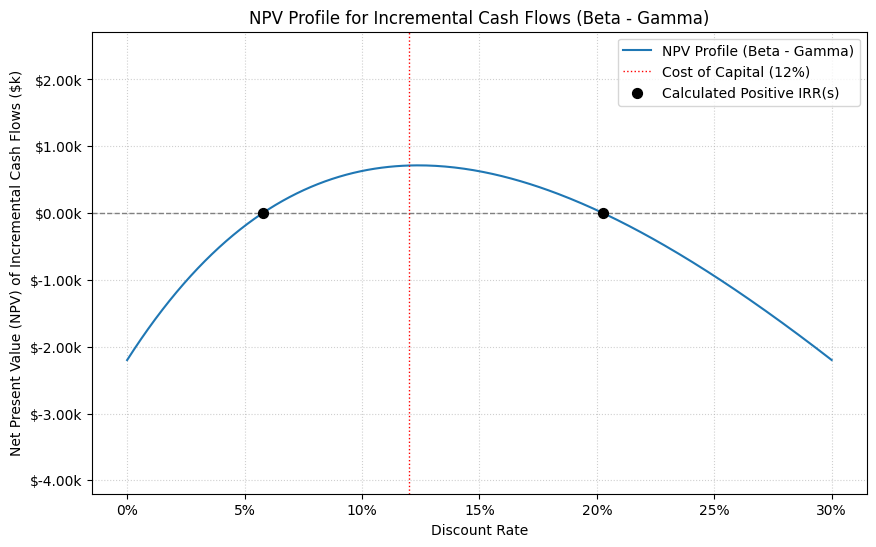


NPV of Incremental Cash Flows at 12% Cost of Capital: $0.71k

Confirmed Positive Incremental IRRs:
  Positive IRR 1: 5.77%
  Positive IRR 2: 20.26%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Incremental Cash Flows (Beta - Gamma) ---
# From Scenario Revision 2
# Year 0: -300 - (-220) = -80
# Year 1:  100 - (-4.2) = 104.2
# Year 2:  120 - 80 = 40
# Year 3:  150 - 176.4 = -26.4
# Year 4:   80 - 120 = -40
incremental_cash_flows = np.array([-80.0, 104.2, 40.0, -26.4, -40.0])

# --- Define NPV Function ---
def calculate_npv(rate, cashflows):
  """Calculates the Net Present Value of a series of cash flows."""
  # Ensure rate is not -1 (which would cause division by zero)
  if rate <= -1.0:
      return np.nan # Indicate undefined NPV for rates <= -100%

  npv = 0.0
  for t, cf in enumerate(cashflows):
    npv += cf / ((1 + rate) ** t)
  return npv

# --- Calculate IRRs using Polynomial Root Finding ---
coefficients = incremental_cash_flows[::-1] # Reverse the cash flow array

try:
    roots = np.roots(coefficients)

    # Filter for real roots where x = 1/(1+r) is positive
    real_roots_x = roots[np.isreal(roots)].real
    positive_real_roots_x = real_roots_x[real_roots_x > 1e-9] # Check > 0

    if len(positive_real_roots_x) == 0:
        print("No positive real roots found for x = 1/(1+r). No meaningful IRR.")
        incremental_irrs = []
    else:
        # Convert x back to r: r = (1/x) - 1
        all_real_irrs = (1 / positive_real_roots_x) - 1
        # Filter for *positive* IRRs as specifically requested
        incremental_irrs = [irr for irr in all_real_irrs if irr > 1e-9] # Check > 0

        #print(f"Potential POSITIVE Incremental IRRs found:")
        #if len(incremental_irrs) > 0:
        #    for i, irr_val in enumerate(incremental_irrs):
        #        print(f"  Positive IRR {i+1}: {irr_val:.2%}")
        #else:
        #     print("  No positive IRRs found.")


except np.linalg.LinAlgError:
    print("Error calculating roots. Could not determine IRRs.")
    incremental_irrs = [] # Set empty list if calculation fails


# --- Generate Data for NPV Profile Plot ---
# Create a range of discount rates to plot
min_rate = 0.0
max_rate = 0.30 # Ensure range covers expected IRRs + CoC
n_points = 300
discount_rates = np.linspace(min_rate, max_rate, n_points)

# Calculate NPV for each discount rate
npv_values = [calculate_npv(rate, incremental_cash_flows) for rate in discount_rates]

# --- Create the Plot ---
plt.figure(figsize=(10, 6))
plt.plot(discount_rates, npv_values, label='NPV Profile (Beta - Gamma)')

# Add horizontal line at NPV = 0
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

# Add vertical line at the cost of capital (12%)
cost_of_capital = 0.12
plt.axvline(cost_of_capital, color='red', linestyle=':', linewidth=1, label=f'Cost of Capital ({cost_of_capital:.0%})')

# Mark the calculated POSITIVE IRRs on the plot
if len(incremental_irrs) > 0:
    # Filter IRRs to be within the plotted range for visibility
    valid_irrs_in_range = [irr for irr in incremental_irrs if min_rate <= irr <= max_rate]
    if valid_irrs_in_range:
        irr_npvs = [calculate_npv(irr, incremental_cash_flows) for irr in valid_irrs_in_range] # Should be close to 0
        plt.scatter(valid_irrs_in_range, irr_npvs, color='black', zorder=5, s=50, label='Calculated Positive IRR(s)')

# Add labels and title
plt.xlabel("Discount Rate")
plt.ylabel("Net Present Value (NPV) of Incremental Cash Flows ($k)")
plt.title("NPV Profile for Incremental Cash Flows (Beta - Gamma)")

# Format axes
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('$%.2fk'))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f%%'))
plt.xticks(np.arange(min_rate, max_rate + 0.05, 0.05), [f"{r:.0%}" for r in np.arange(min_rate, max_rate + 0.05, 0.05)])

# Add grid and legend
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# Adjust y-axis limits for better visibility around zero if needed
min_npv = min(v for v in npv_values if not np.isnan(v)) # Handle potential NaNs
max_npv = max(v for v in npv_values if not np.isnan(v))
plt.ylim(min_npv - 2, max_npv + 2) # Adjust vertical padding


# Show the plot
plt.show()

# --- Recalculate Incremental NPV at Cost of Capital for confirmation ---
npv_at_coc = calculate_npv(cost_of_capital, incremental_cash_flows)
print(f"\nNPV of Incremental Cash Flows at {cost_of_capital:.0%} Cost of Capital: ${npv_at_coc:.2f}k")

# Print the confirmed positive IRRs again for clarity
print(f"\nConfirmed Positive Incremental IRRs:")
if len(incremental_irrs) > 0:
    for i, irr_val in enumerate(incremental_irrs):
        print(f"  Positive IRR {i+1}: {irr_val:.2%}")
else:
     print("  No positive IRRs found.")

---

### What is next?

* Problem Set 3
* Fundamentals of Capital Budgeting
    *   Reading(s):
        *   CF-B&D: Ch. 8

---